In [3]:
import pandas as pd
import numpy as np
import ast
import re
import matplotlib.pyplot as plt


In [4]:
awards = pd.read_csv('GoodReads-Copy1.Best_Books_Ever 2.csv')
#awards = awards.drop(['Unnamed: 0'],axis=1)
awards = awards['awards']
awards.shape

(52478,)

In [5]:
type(awards)

pandas.core.series.Series

In [6]:
# Dataframe
awards_df = awards.to_frame(name='awards')

In [7]:
awards_df.head(10)

,awards
0,['Locus Award Nominee for Best Young Adult Boo...
1,['Bram Stoker Award for Works for Young Reader...
2,"['Pulitzer Prize for Fiction (1961)', 'Audie A..."
3,[]
4,"['Georgia Peach Book Award (2007)', 'Buxtehude..."
5,['National Jewish Book Award for Children’s an...
6,"['Prometheus Hall of Fame Award (2011)', 'Retr..."
7,[]
8,[]
9,"['Pulitzer Prize for Novel (1937)', 'National ..."


#### Drop years from awards name

In [8]:
#import re

# Function to delete years from awards name
def remove_years(text):
    text = re.sub(r'\(\d{4}\)', '', text)  # Remove years in parentheses
    text = text.strip()  # Remove trailing whitespace characters
    return text


# Apply function
awards_df['awards'] = awards_df['awards'].apply(remove_years)

In [9]:
awards_df.head(10)

,awards
0,['Locus Award Nominee for Best Young Adult Boo...
1,['Bram Stoker Award for Works for Young Reader...
2,"['Pulitzer Prize for Fiction ', 'Audie Award f..."
3,[]
4,"['Georgia Peach Book Award ', 'Buxtehuder Bull..."
5,['National Jewish Book Award for Children’s an...
6,"['Prometheus Hall of Fame Award ', 'Retro Hugo..."
7,[]
8,[]
9,"['Pulitzer Prize for Novel ', 'National Book A..."


### Reducing number of unique awards

In [10]:
# New dataframe with only non-empty award lists
non_empty_df = awards_df[awards_df['awards'].apply(lambda x: len(eval(x)) > 0)]
display(non_empty_df.head(10), non_empty_df.shape)

,awards
0,['Locus Award Nominee for Best Young Adult Boo...
1,['Bram Stoker Award for Works for Young Reader...
2,"['Pulitzer Prize for Fiction ', 'Audie Award f..."
4,"['Georgia Peach Book Award ', 'Buxtehuder Bull..."
5,['National Jewish Book Award for Children’s an...
6,"['Prometheus Hall of Fame Award ', 'Retro Hugo..."
9,"['Pulitzer Prize for Novel ', 'National Book A..."
10,"['Georgia Peach Book Award ', 'Buxtehuder Bull..."
14,"['British Book Award for Book of the Year ', '..."
20,"['Prometheus Hall of Fame Award ', 'Geffen Awa..."


(10614, 1)

In [11]:
# Extracting unique values of awards

#import ast

# Convert string to list using ast.literal_eval
awards_lists = [ast.literal_eval(row) for row in non_empty_df['awards']]

# Extract unique awards from all rows using a set comprehension
unique_awards = {award for row in awards_lists for award in row}
unique_awards
print("Unique awards from original dataframe: ",len(unique_awards))

Unique awards from original dataframe:  5831


In [12]:
# Count the number of occurrences of each award in the values of non_empty_df
award_counts = {award: sum(award in row for row in awards_lists) for award in unique_awards}
#award_counts

In [13]:
count_one = sum(1 for count in award_counts.values() if count == 1),
count_two_three = sum(1 for count in award_counts.values() if count in [2, 3])
count_four_eight = sum(1 for count in award_counts.values() if 4 <= count <= 8)
count_nine_fifteen = sum(1 for count in award_counts.values() if 9 <= count <= 15)

print("Number of awards with count = 1:", count_one)
print("Number of awards with count = 2 or 3:", count_two_three)
print("Number of awards with count = 4-8:", count_four_eight)
print("Number of awards with count = 9-15:", count_nine_fifteen)

Number of awards with count = 1: (3518,)
Number of awards with count = 2 or 3: 1151
Number of awards with count = 4-8: 686
Number of awards with count = 9-15: 241


In [14]:
unique_awards = set(award_counts.keys())
other_literary_prizes_added = False

for award, count in award_counts.items():
    if count == 1 and award in unique_awards:
        unique_awards.remove(award)
        if not other_literary_prizes_added:
            unique_awards.add("Unique Award (1)")
            other_literary_prizes_added = True
    elif count in [2, 3] and award in unique_awards:
        unique_awards.remove(award)
        if not other_literary_prizes_added:
            unique_awards.add("Uncommon Award (2,3)")
            other_literary_prizes_added = True
    elif 4 <= count <= 8 and award in unique_awards:
        unique_awards.remove(award)
        if not other_literary_prizes_added:
            unique_awards.add("Singular Award (4-8)")
            other_literary_prizes_added = True
    elif 9 <= count <= 15 and award in unique_awards:
        unique_awards.remove(award)
        if not other_literary_prizes_added:
            unique_awards.add("Frequently Awarded Literary Prizes (9-15)")
            other_literary_prizes_added = True


In [15]:
len(unique_awards)

236

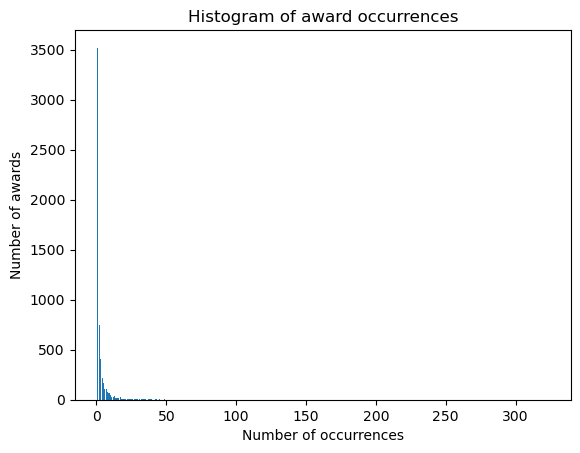

In [16]:
#import matplotlib.pyplot as plt

# Create a list of counts
counts = list(award_counts.values())

# Create a histogram of the counts
plt.hist(counts, bins=range(1, max(counts)+1), align='left', rwidth=0.8)

# Add labels and title
plt.xlabel("Number of occurrences")
plt.ylabel("Number of awards")
plt.title("Histogram of award occurrences")

# Display the plot
plt.show()


In [17]:
num_unique_awards = len(unique_awards)
print("New unique award count: ", num_unique_awards)

New unique award count:  236


In [18]:
#unique_awards

### Preparing new dataframe

In [19]:
# Create an empty DataFrame with columns named after the unique awards
award_newdf = pd.DataFrame(columns=list(unique_awards))

In [20]:
award_newdf.shape

(0, 236)

In [21]:
awards_df

,awards
0,['Locus Award Nominee for Best Young Adult Boo...
1,['Bram Stoker Award for Works for Young Reader...
2,"['Pulitzer Prize for Fiction ', 'Audie Award f..."
3,[]
4,"['Georgia Peach Book Award ', 'Buxtehuder Bull..."
...,...
52473,[]
52474,[]
52475,"[""Readers' Favorite Book Award ""]"
52476,[]


In [22]:
from collections import Counter

award_counts = Counter(award for row in awards_lists for award in row)

award_bins = {}

for award, count in award_counts.items():
    if count == 1:
        award_bins[award] = 'Unique Award (1)'
    elif count in [2, 3]:
        award_bins[award] = 'Uncommon Award (2,3)'
    elif count in range(4, 9):
        award_bins[award] = 'Singular Award (4-8)'
    elif count in range(9, 16):
        award_bins[award] = 'Frequently Awarded Literary Prizes (9-15)'


In [23]:
#award_bins

In [24]:
awards_df['awards'] = awards_df['awards'].apply(lambda x: [award_bins.get(award, award) for award in ast.literal_eval(x)])


In [25]:
#display(awards_df.iloc[0], award_newdf.iloc[0])

In [26]:
# Sort the columns of the DataFrame by name in descending order
award_newdf = award_newdf.sort_index(axis=1, ascending=True)
award_newdf.columns

Index(['ALA Alex Award ', 'Ambassador Book Award for Fiction ',
       'Amelia Elizabeth Walden Award Nominee ', 'American Book Award ',
       'Andre Norton Award Nominee ',
       'Andrew Carnegie Medal Nominee for Fiction ',
       'Andrew Carnegie Medal Nominee for Nonfiction ',
       'Anisfield-Wolf Book Award ',
       'Anthony Award Nominee for Best First Novel ',
       'Anthony Award Nominee for Best Novel ',
       ...
       'West Australian Young Readers' Book Award (WAYRBA) for Older Readers ',
       'West Australian Young Readers' Book Award (WAYRBA) for Younger Readers ',
       'William Allen White Children's Book Award ',
       'William C. Morris YA Debut Award Nominee ',
       'Women's Prize for Fiction Nominee ',
       'Women's Prize for Fiction Nominee for Longlist ',
       'World Fantasy Award Nominee for Best Novel ',
       'World Fantasy Award for Best Novel ', 'Zilveren Griffel ',
       'الجائزة العالمية للرواية العربية (أي باف) / International Prize for

### Filling awards_newdf

In [37]:
# Loop through each row in the awards_df dataframe
for idx, row in awards_df.iterrows():
    # Check if the 'Awards' list of the current row is not empty
    if len(row['awards']) > 0:
        # Loop through each value in the 'Awards' list of the current row
        for award in row['awards']:
            # Check if the current award is a column in the award_newdf dataframe
            if award in award_newdf.columns:
                # If the award is in the award_newdf dataframe, set the corresponding value to 1
                award_newdf.at[idx, award] = 1
            else:
                # If the award is not in the award_newdf dataframe, determine which bin it belongs to
                bin_name = award_bins.get(award, None)
                if bin_name is not None:
                    # Set the corresponding value in the award_newdf dataframe to 1 for the determined bin
                    award_newdf.at[idx, bin_name] = 1
    else:
        # If the 'Awards' list of the current row is empty, set all values to NaN
        award_newdf.loc[idx] = np.nan
    # Print the number of rows added to award_newdf so far
    print(f"Rows processed: {idx + 1}", end='\r', flush=True)

# Print the final number of rows added to award_newdf
print(f"\nTotal rows added: {len(award_newdf)}")


Rows added: 52478
Total rows added: 49587


In [39]:
display(award_newdf.head(), award_newdf.shape)

,ALA Alex Award,Ambassador Book Award for Fiction,Amelia Elizabeth Walden Award Nominee,American Book Award,Andre Norton Award Nominee,Andrew Carnegie Medal Nominee for Fiction,Andrew Carnegie Medal Nominee for Nonfiction,Anisfield-Wolf Book Award,Anthony Award Nominee for Best First Novel,Anthony Award Nominee for Best Novel,...,West Australian Young Readers' Book Award (WAYRBA) for Older Readers,West Australian Young Readers' Book Award (WAYRBA) for Younger Readers,William Allen White Children's Book Award,William C. Morris YA Debut Award Nominee,Women's Prize for Fiction Nominee,Women's Prize for Fiction Nominee for Longlist,World Fantasy Award Nominee for Best Novel,World Fantasy Award for Best Novel,Zilveren Griffel,الجائزة العالمية للرواية العربية (أي باف) / International Prize for Arabic Fiction (IPAF) Nominee
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(49587, 236)

In [40]:
duplicates = awards_df.index.duplicated(keep=False)
print(duplicates.sum())


0


In [52]:
# Loop through each row in the awards_df dataframe
for idx, row in awards_df.iterrows():
    # Check if the 'Awards' list of the current row is not empty
    if len(row['awards']) > 0:
        # Loop through each value in the 'Awards' list of the current row
        for award in row['awards']:
            # Check if the current award is a column in the award_newdf dataframe
            if award in award_newdf.columns:
                # If the award is in the award_newdf dataframe, set the corresponding value to 1
                award_newdf.at[idx, award] = 1
            else:
                # If the award is not in the award_newdf dataframe, determine which bin it belongs to
                bin_name = award_bins.get(award, None)
                if bin_name is not None:
                    # Set the corresponding value in the award_newdf dataframe to 1 for the determined bin
                    award_newdf.at[idx, bin_name] = 1
    else:
        # If the 'Awards' list of the current row is empty, set all values to NaN
        award_newdf.loc[idx] = np.nan
    # Print the number of rows processed so far
    print(f"Rows processed: {idx + 1}", end='\r', flush=True)

# Print the final number of rows in the award_newdf dataframe
print(f"\nTotal rows added: {len(award_newdf)}")

# Print the number of rows in awards_df that were not included in award_newdf
print(f"Number of rows not included: {len(awards_df) - len(award_newdf)}")

Rows processed: 52478
Total rows added: 54504
Number of rows not included: -2026


In [53]:
display(award_newdf.head(), award_newdf.shape)

,ALA Alex Award,Ambassador Book Award for Fiction,Amelia Elizabeth Walden Award Nominee,American Book Award,Andre Norton Award Nominee,Andrew Carnegie Medal Nominee for Fiction,Andrew Carnegie Medal Nominee for Nonfiction,Anisfield-Wolf Book Award,Anthony Award Nominee for Best First Novel,Anthony Award Nominee for Best Novel,...,West Australian Young Readers' Book Award (WAYRBA) for Younger Readers,William Allen White Children's Book Award,William C. Morris YA Debut Award Nominee,Women's Prize for Fiction Nominee,Women's Prize for Fiction Nominee for Longlist,World Fantasy Award Nominee for Best Novel,World Fantasy Award for Best Novel,Zilveren Griffel,الجائزة العالمية للرواية العربية (أي باف) / International Prize for Arabic Fiction (IPAF) Nominee,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


(54504, 237)

In [27]:
# Loop through each row in the awards_df dataframe
for idx, row in awards_df.iterrows():
    # Loop through each value in the 'Awards' list of the current row
    for award in row['awards']:
        # Check if the current award is a column in the award_newdf dataframe
        if award in award_newdf.columns:
            # If the award is in the award_newdf dataframe, set the corresponding value to 1
            award_newdf.at[idx, award] = 1
        else:
             # If the award is not in the award_newdf dataframe, determine which bin it belongs to
            bin_name = award_bins.get(award, None)
            if bin_name is not None:
            # Set the corresponding value in the award_newdf dataframe to 1 for the determined bin
                award_newdf.at[idx, bin_name] = 1
    # Print the number of rows added to award_newdf so far
    print(f"Rows added: {idx + 1}", end='\r', flush=True)

# Print the final number of rows added to award_newdf
#print(f"\nTotal rows added: {len(award_newdf)}")

In [28]:
award_newdf

,ALA Alex Award,Ambassador Book Award for Fiction,Amelia Elizabeth Walden Award Nominee,American Book Award,Andre Norton Award Nominee,Andrew Carnegie Medal Nominee for Fiction,Andrew Carnegie Medal Nominee for Nonfiction,Anisfield-Wolf Book Award,Anthony Award Nominee for Best First Novel,Anthony Award Nominee for Best Novel,...,West Australian Young Readers' Book Award (WAYRBA) for Older Readers,West Australian Young Readers' Book Award (WAYRBA) for Younger Readers,William Allen White Children's Book Award,William C. Morris YA Debut Award Nominee,Women's Prize for Fiction Nominee,Women's Prize for Fiction Nominee for Longlist,World Fantasy Award Nominee for Best Novel,World Fantasy Award for Best Novel,Zilveren Griffel,الجائزة العالمية للرواية العربية (أي باف) / International Prize for Arabic Fiction (IPAF) Nominee
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Get the first row of award_newdf and drop any NaN values
first_row = award_newdf.iloc[0].dropna()

# Print the non-NaN values in the first row
print(first_row)

Buxtehuder Bulle                                                         1
California Young Readers Medal for Young Adult                           1
Charlotte Award                                                          1
Dorothy Canfield Fisher Children's Book Award                            1
Eliot Rosewater Indiana High School Book Award                           1
Evergreen Teen Book Award                                                1
Lincoln Award                                                            1
Locus Award Nominee for Best Young Adult Book                            1
Milwaukee County Teen Book Award Nominee                                 1
New Mexico Land of Enchantment Award for Young Adult                     1
Rebecca Caudill Young Readers' Book Award                                1
Soaring Eagle Book Award                                                 1
The Inky Awards Shortlist for Silver Inky                                1
Unique Award (1)         

In [30]:
awards_df.iloc[0]

awards    [Locus Award Nominee for Best Young Adult Book...
Name: 0, dtype: object

In [32]:
# Replacing NaN for 0
award_newdf = award_newdf.fillna(0)

In [33]:
award_newdf

,ALA Alex Award,Ambassador Book Award for Fiction,Amelia Elizabeth Walden Award Nominee,American Book Award,Andre Norton Award Nominee,Andrew Carnegie Medal Nominee for Fiction,Andrew Carnegie Medal Nominee for Nonfiction,Anisfield-Wolf Book Award,Anthony Award Nominee for Best First Novel,Anthony Award Nominee for Best Novel,...,West Australian Young Readers' Book Award (WAYRBA) for Older Readers,West Australian Young Readers' Book Award (WAYRBA) for Younger Readers,William Allen White Children's Book Award,William C. Morris YA Debut Award Nominee,Women's Prize for Fiction Nominee,Women's Prize for Fiction Nominee for Longlist,World Fantasy Award Nominee for Best Novel,World Fantasy Award for Best Novel,Zilveren Griffel,الجائزة العالمية للرواية العربية (أي باف) / International Prize for Arabic Fiction (IPAF) Nominee
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
import pandas as pd

# assuming the award_df dataframe is already loaded

# check if any rows have all values as 0
all_zeros = award_newdf.eq(0).all(axis=1).any()

if all_zeros:
    print("There are rows with all values as 0 in award_df")
else:
    print("There are no rows with all values as 0 in award_df")


There are no rows with all values as 0 in award_df


### Save to csv

In [34]:
award_newdf.to_csv('award_df.csv')